In [1]:
import os
import glob
import subprocess
import numpy as np

import clima_anom as ca

import xarray as xr
import pandas as pd

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [2]:
year = '2019'
month = '03'

In [3]:
list_files = glob.glob('/home/arturo/Documents/GLM/'+year+'/'+month+'/*.nc')
list_files = sorted(list_files)
print(list_files[0:5])

['/home/arturo/Documents/GLM/2019/03/OR_GLM-L2-LCFA_G16_s20190300000000_e20190300000200_c20190300000226.nc', '/home/arturo/Documents/GLM/2019/03/OR_GLM-L2-LCFA_G16_s20190300000200_e20190300000400_c20190300000428.nc', '/home/arturo/Documents/GLM/2019/03/OR_GLM-L2-LCFA_G16_s20190300000400_e20190300001000_c20190300001027.nc', '/home/arturo/Documents/GLM/2019/03/OR_GLM-L2-LCFA_G16_s20190300001000_e20190300001200_c20190300001226.nc', '/home/arturo/Documents/GLM/2019/03/OR_GLM-L2-LCFA_G16_s20190300001200_e20190300001400_c20190300001427.nc']


In [4]:
lat_min = -60
lat_max = 15
lon_min = -85
lon_max = -30

command = '-sellonlatbox,lon_min,lon_max,lat_min,lat_max'

In [5]:
dir_out = '/home/arturo/Documents/GLM/SA/'+year+'/'+month+'/'

for t in range(2):#len(list_files))
    infile = list_files[t]
    filename = list_files[t].split('/')[-1]
    fileout = dir_out + filename
    print(infile)

    if not os.path.exists(dir_out):
        os.makedirs(dir_out)

    # subprocess.run(["cdo", command, infile, fileout])


/home/arturo/Documents/GLM/2019/03/OR_GLM-L2-LCFA_G16_s20190300000000_e20190300000200_c20190300000226.nc
/home/arturo/Documents/GLM/2019/03/OR_GLM-L2-LCFA_G16_s20190300000200_e20190300000400_c20190300000428.nc


In [6]:
data = ca.read_netcdf(infile,1)
# data = xr.open_dataset(infile)

Number of variables:  48


In [7]:
event_list = ['event_id', 'event_time_offset', 'event_lat', 'event_lon', 'event_energy', 'event_parent_group_id']
group_list = ['group_id', 'group_time_offset', 'group_frame_time_offset', 'group_lat', 'group_lon', 'group_area', 'group_energy', 'group_parent_flash_id', 'group_quality_flag']
flash_list = ['flash_id', 'flash_time_offset_of_first_event', 'flash_time_offset_of_last_event', 'flash_frame_time_offset_of_first_event', 'flash_frame_time_offset_of_last_event', 'flash_lat', 'flash_lon', 'flash_area', 'flash_energy', 'flash_quality_flag']

In [8]:
event_array = None

for nn in range(len(event_list)):

    if event_array is None:

        event_array = data[event_list[nn]]

    else:

        event_array = np.vstack([event_array, data[event_list[nn]]])

event_array = event_array.T

In [9]:
group_array = None

for nn in range(len(group_list)):

    if group_array is None:

        group_array = data[group_list[nn]]

    else:

        group_array = np.vstack([group_array, data[group_list[nn]]])

group_array = group_array.T

In [10]:
flash_array = None

for nn in range(len(flash_list)):

    if flash_array is None:

        flash_array = data[flash_list[nn]]

    else:

        flash_array = np.vstack((flash_array, data[flash_list[nn]]))

flash_array = flash_array.T

In [11]:
df_event = pd.DataFrame(event_array, columns=event_list)
df_event = df_event[(df_event['event_lat'] > lat_min) & (df_event['event_lat'] < lat_max ) & (df_event['event_lon'] > lon_min) & (df_event['event_lon'] > lon_min)]

In [12]:
df_group = pd.DataFrame(group_array, columns=group_list)
df_group = df_group[(df_group['group_lat'] > lat_min) & (df_group['group_lat'] < lat_max ) & (df_group['group_lon'] > lon_min) & (df_group['group_lon'] > lon_min)]

In [13]:
df_flash = pd.DataFrame(flash_array, columns=flash_list)
df_flash = df_flash[(df_flash['flash_lat'] > lat_min) & (df_flash['flash_lat'] < lat_max ) & (df_flash['flash_lon'] > lon_min) & (df_flash['flash_lon'] > lon_min)]

In [40]:
df_out = pd.concat([df_event, df_group, df_flash]).reset_index(drop=True)
df_out = df_out.astype(np.float32)
# df_out.replace(np.nan, -9999, inplace=True)

# df_out['event_id'] = df_out['event_id'].astype(int)
# df_out['group_id'] = df_out['group_id'].astype(int)
# df_out['flash_id'] = df_out['flash_id'].astype(int)

df_out.head(5)

,event_id,event_time_offset,event_lat,event_lon,event_energy,event_parent_group_id,group_id,group_time_offset,group_frame_time_offset,group_lat,...,flash_id,flash_time_offset_of_first_event,flash_time_offset_of_last_event,flash_frame_time_offset_of_first_event,flash_frame_time_offset_of_last_event,flash_lat,flash_lon,flash_area,flash_energy,flash_quality_flag
0,39128588.0,-0.662241,-30.789158,-67.968758,4.577910e-15,18288984.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39128608.0,-0.606545,-30.789158,-67.968758,6.103880e-15,18288990.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39128608.0,-0.600442,-30.789158,-67.968758,1.525970e-15,18288992.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39128668.0,-0.399786,-30.789158,-67.968758,3.051940e-15,18289020.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,39128564.0,-0.728618,-35.375786,-49.937080,7.629850e-15,18288968.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
fileout2 = fileout.replace('.nc','.feather')
df_out.to_feather(fileout2)

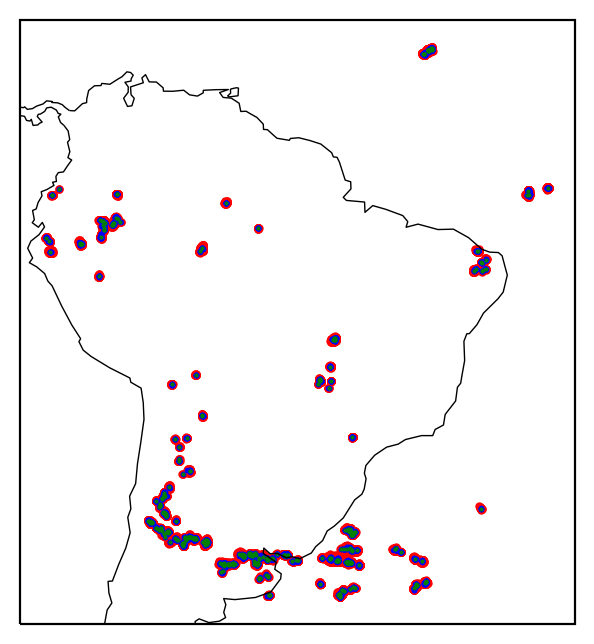

In [43]:
proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r

fig = plt.figure(figsize=(4,4),dpi=200)
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0, 0], projection = proj)
# ax1.set_extent([lon_min,lon_max,lat_min,lat_max],crs=proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)

plt.plot(df_out['event_lon'],df_out['event_lat'],'ro',markersize=2)
plt.plot(df_out['group_lon'],df_out['group_lat'],'bo',markersize=1)
plt.plot(df_out['flash_lon'],df_out['flash_lat'],'go',markersize=0.5)